In [62]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

In [59]:
f_path = "/Users/jessbreda/Desktop/github/jbreda_animal_training/code/training_performance/matlab/2023_12_24_R029_give_del_pokes.csv"

df = pd.read_csv(f_path)
df["incorrect_poke_during_delay"] = df.n_incorrect_pokes > 0
df.replace("029_23", "231220", inplace=True)
df["date"] = pd.to_datetime(df["date"], format="%y%m%d").dt.date

In [44]:
df.head()

,date,trial,block_type,side,result,give_delay,give_use,n_incorrect_pokes,incorrect_poke_during_delay
0,2023-12-22,24,anti,RIGHT,1,0.26,1,0,False
1,2023-12-22,25,anti,LEFT,2,0.27,1,0,False
2,2023-12-22,26,anti,LEFT,2,0.27,1,0,False
3,2023-12-22,27,anti,RIGHT,2,0.27,1,3,True
4,2023-12-22,28,anti,LEFT,2,0.27,1,0,False


<Axes: xlabel='trial', ylabel='give_delay'>

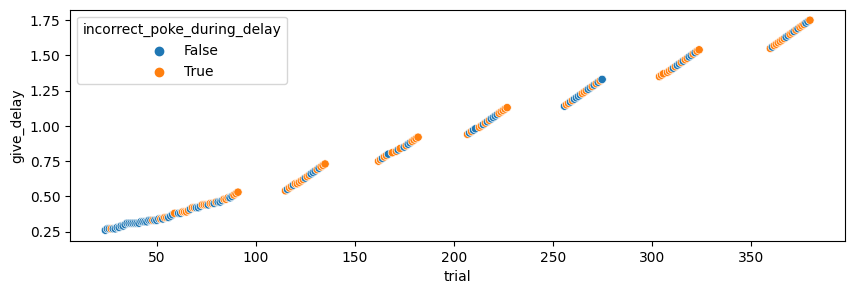

In [50]:
fig, ax = plt.subplots(figsize=(10, 3))
single_date = datetime(2023, 12, 22).date()
sdf = df.query("date == @single_date")


sns.scatterplot(
    data=sdf,
    x="trial",
    y="give_delay",
    hue="incorrect_poke_during_delay",
    ax=ax,
    marker="o",
)

In [57]:
df.date

0      2023-12-22
1      2023-12-22
2      2023-12-22
3      2023-12-22
4      2023-12-22
          ...    
709    2023-12-19
710    2023-12-19
711    2023-12-19
712    2023-12-19
713    2023-12-19
Name: date, Length: 714, dtype: object

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Fraction'),
 Text(0.5, 1.0, 'Fraction Trials with Incorrect Poke During Give Delay'),
 (0.0, 1.0)]

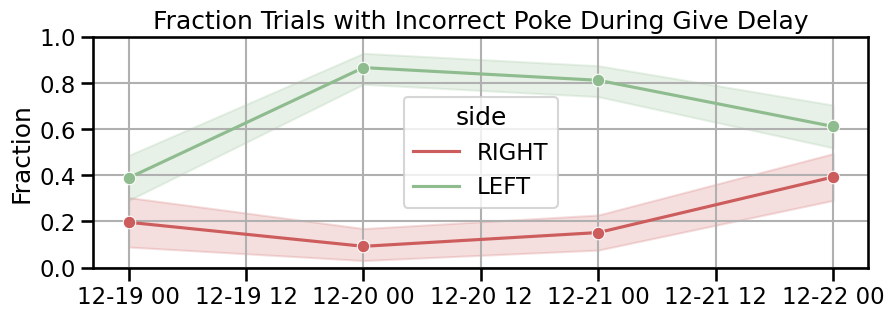

In [73]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(
    data=df,
    x="date",
    y="incorrect_poke_during_delay",
    marker="o",
    hue="side",
    hue_order=["RIGHT", "LEFT"],
    palette=["indianred", "darkseagreen"],
)

ax.grid()
ax.set(
    xlabel="",
    ylabel="Fraction",
    title="Fraction Trials with Incorrect Poke During Give Delay",
    ylim=(0, 1),
)

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Fraction'),
 Text(0.5, 1.0, 'Fraction Trials with Incorrect Poke During Give Delay'),
 (0.0, 1.0)]

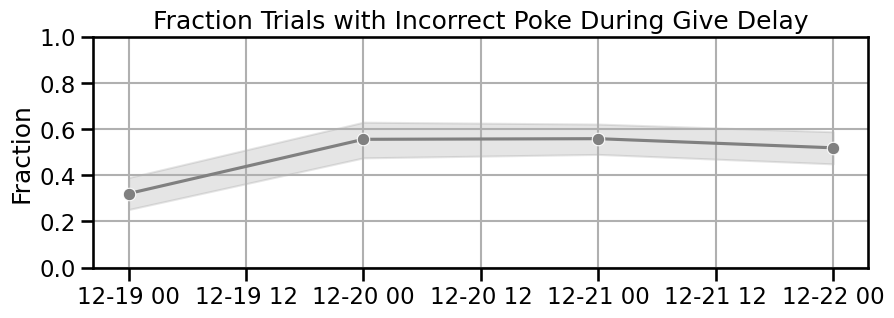

In [79]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(
    data=df, x="date", y="incorrect_poke_during_delay", marker="o", color="gray"
)

ax.grid()
ax.set(
    xlabel="",
    ylabel="Fraction",
    title="Fraction Trials with Incorrect Poke During Give Delay",
    ylim=(0, 1),
)

In [74]:
# want a plot to also see the volume of incorrect pokes during delay over days

In [76]:
sdf.groupby(["result", "incorrect_poke_during_delay"]).size().reset_index()

,result,incorrect_poke_during_delay,0
0,1,False,69
1,1,True,78
2,2,False,21
3,2,True,19


In [77]:
sdf.query("give_use == 0").groupby(
    ["result", "incorrect_poke_during_delay"]
).size().reset_index()

,result,incorrect_poke_during_delay,0
0,1,False,62
1,1,True,38
